In [1]:
%load_ext autoreload
%autoreload 2
!pwd
import os
import sys 
if os.path.abspath("../../../") not in sys.path:
    sys.path.append(os.path.abspath("../../../")) 

import os
# import networkx as nx
from rwtools.nemesis.latency_map.create_latency_map import *
from rwtools.nemesis.graph.nemesis_node import AbstractNemesisNode
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from rwtools.nemesis.control_flow_graph import ControlFlowGraph


In [2]:
import sys 
sys.executable

'/home/gilles/git-repos/NemesisRetroWrite/retrowrite/venv/bin/python'

In [3]:
from test_main import setup 

binary = os.path.abspath("./loop/loop")
outputfile = "./loop/loop_rw.s"
loader, rw = setup(binary, outputfile)
rw.dump()

[*] Relocations for a section that's not loaded: .rela.dyn
[*] Relocations for a section that's not loaded: .rela.plt
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3df0
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


[*] Relocations for a section that's not loaded: .rela.dyn
[*] Relocations for a section that's not loaded: .rela.plt
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3df0
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8
no latency information found for instruction: callq 
no latency information found for instruction: jge 
no latency information found for instruction: jge 
no latency information found for instruction: retq 


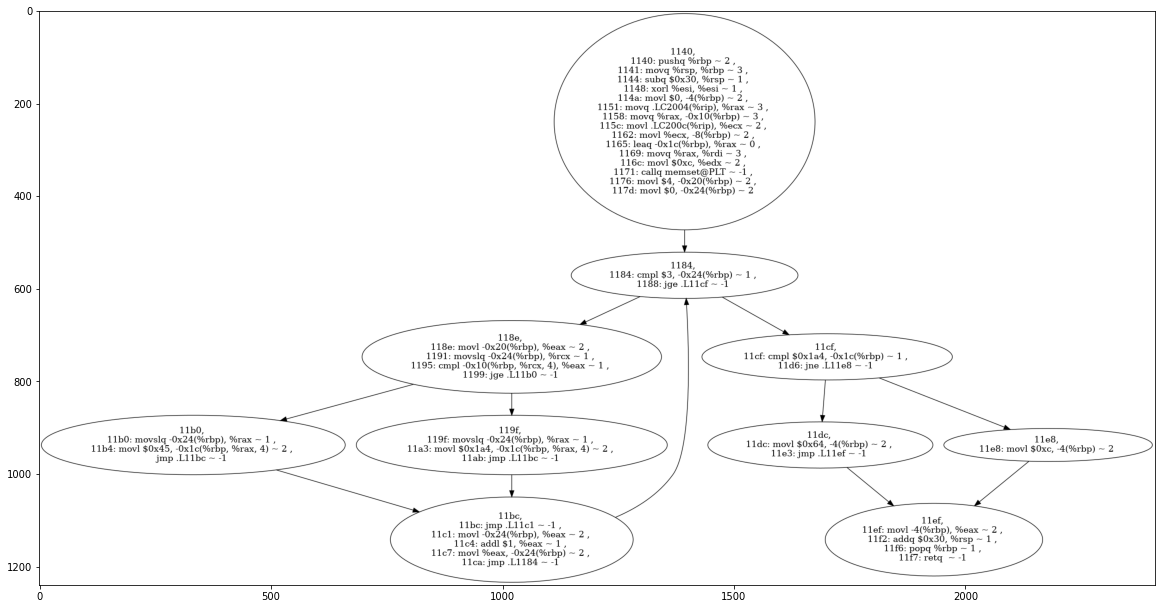

In [7]:
from rwtools.nemesis.nemesistool import NemesisInstrument 


binary = os.path.abspath("./loop/loop")
outputfile = "./loop_rw.s"

nemesis = NemesisInstrument(binary, outputfile)
figs, axs = plt.subplots(1, figsize=(20,20))

axs.imshow(nemesis.render_cfg())


nemesis.instrument(nemesis.cfg.get_node('118e'))
# nemesis.instrument(nemesis.cfg.get_node('11cf'))
axs.imshow(nemesis.render_cfg())

# nemesis.dump()


In [ ]:


binary = os.path.abspath("./a.out")
outputfile = "./loop_rw.s"

target_node = nemesis.cfg.get_node('118e')
nemesis = NemesisInstrument(binary, outputfile)

figs, axs = plt.subplots(1, figsize=(20,20))

# nemesis.instrument(nemesis.cfg.get_node('118e'))
# nemesis.instrument(nemesis.cfg.get_node('11cf'))
axs.imshow(nemesis.render_cfg())

# nemesis.dump()
